In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
df= pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
m = df.isna().sum()
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
Y = df[['Survived']]

In [8]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [11]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


Seperate cat and con features for X

In [12]:
cat = X.columns[X.dtypes==object]
con= X.columns[X.dtypes!=object]

In [13]:
cat

Index(['Sex', 'Embarked'], dtype='object')

In [14]:
con

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

Create a preprocessing pipleine

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [18]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [24]:
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [29]:
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [30]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0



Apply train test split

In [31]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2,random_state=42)

In [32]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
331,-1.566107,1.240235,-0.474545,-0.473674,-0.074583,0.0,1.0,0.0,0.0,1.0
733,-0.369365,-0.488887,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0
382,0.827377,0.202762,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
704,0.827377,-0.258337,0.432793,-0.473674,-0.490280,0.0,1.0,0.0,0.0,1.0
813,0.827377,-1.795334,3.154809,2.008933,-0.018709,1.0,0.0,0.0,0.0,1.0


In [33]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [35]:
xtrain.shape

(712, 10)

In [36]:
xtest.shape

(179, 10)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [55]:
dct = {'Logistic' : LogisticRegression(),
        'decisiontree' : DecisionTreeClassifier(),
        'randomforest' : RandomForestClassifier(),
        'gradientboosting' :GradientBoostingClassifier(),
        'knn' : KNeighborsClassifier(),
        'svc' : SVC()}

In [56]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('decisiontree', DecisionTreeClassifier()), ('randomforest', RandomForestClassifier()), ('gradientboosting', GradientBoostingClassifier()), ('knn', KNeighborsClassifier()), ('svc', SVC())])

Fit the model and evaluate the results Evaluate model with f1 score

In [57]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [63]:

tr = []
tr_cv  =[]
ts = []
for name, model in dct.items():
    model.fit(xtrain, ytrain)
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    f1_tr = f1_score(ytrain, ypred_tr)
    f1_ts = f1_score(ytest, ypred_ts)
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    tr.append(f1_tr)
    ts.append(f1_ts)
    tr_cv.append(f1_cv)
    print(f'Model name : {name}\n')
    print(f'TRAIN F1 : {f1_tr:.4f}')
    print(f'Test F1 : {f1_ts:.4f}')
    print(f'F1 SCORE ; {f1_cv:.4f}')
    print('\n=================================================================\n')      
          
          

Model name : Logistic

TRAIN F1 : 0.7237
Test F1 : 0.7639
F1 SCORE ; 0.7721


Model name : decisiontree

TRAIN F1 : 0.9713
Test F1 : 0.7383
F1 SCORE ; 0.7418


Model name : randomforest

TRAIN F1 : 0.9715
Test F1 : 0.7586
F1 SCORE ; 0.7859


Model name : gradientboosting

TRAIN F1 : 0.8589
Test F1 : 0.7681
F1 SCORE ; 0.7944


Model name : knn

TRAIN F1 : 0.8063
Test F1 : 0.7465
F1 SCORE ; 0.7788


Model name : svc

TRAIN F1 : 0.7732
Test F1 : 0.7660
F1 SCORE ; 0.8047




In [64]:
tr

[0.7237354085603113,
 0.97131931166348,
 0.9715370018975333,
 0.8588709677419355,
 0.8062622309197652,
 0.7731755424063116]

In [66]:
ts

[0.7638888888888888,
 0.738255033557047,
 0.7586206896551724,
 0.7681159420289855,
 0.7464788732394366,
 0.7659574468085106]

In [68]:
tr_cv

[0.7721354083467665,
 0.7418122005320875,
 0.7858608242682411,
 0.7943754062926301,
 0.7787961811396149,
 0.8047463249563535]

In [69]:
dct

{'Logistic': LogisticRegression(),
 'decisiontree': DecisionTreeClassifier(),
 'randomforest': RandomForestClassifier(),
 'gradientboosting': GradientBoostingClassifier(),
 'knn': KNeighborsClassifier(),
 'svc': SVC()}

In [70]:
list(dct.keys())

['Logistic', 'decisiontree', 'randomforest', 'gradientboosting', 'knn', 'svc']

In [74]:
result_dct = {'MODEL NAME' : list(dct.keys()),
              'TRAIN F1' : tr,
              'TEST F1' : ts,
              'F1 SCORE' : tr_cv}              

In [75]:
results_df = pd.DataFrame(result_dct)
results_df

,MODEL NAME,TRAIN F1,TEST F1,F1 SCORE
0,Logistic,0.723735,0.763889,0.772135
1,decisiontree,0.971319,0.738255,0.741812
2,randomforest,0.971537,0.758621,0.785861
3,gradientboosting,0.858871,0.768116,0.794375
4,knn,0.806262,0.746479,0.778796
5,svc,0.773176,0.765957,0.804746


In [79]:
results_df = results_df.sort_values(by='TEST F1', ascending=False)
results_df

,MODEL NAME,TRAIN F1,TEST F1,F1 SCORE
3,gradientboosting,0.858871,0.768116,0.794375
5,svc,0.773176,0.765957,0.804746
0,Logistic,0.723735,0.763889,0.772135
2,randomforest,0.971537,0.758621,0.785861
4,knn,0.806262,0.746479,0.778796
1,decisiontree,0.971319,0.738255,0.741812


applying gradient boosting algo


In [80]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate=0.001, n_estimators=1,max_depth=2, min_samples_split=5, min_samples_leaf=5)

In [81]:
model.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.001, max_depth=2, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

hyperparameter tuning with randomize cv

In [93]:
params = {'learning_rate':[0.01, 0.05, 0.1, 0.2],
          'n_estimators':[10, 50, 100, 200],
          'max_depth':[2, 3, 4, 5, 6, 7],
          'min_samples_split':[5, 6, 7, 8, 9, 10]}

In [94]:
from sklearn.model_selection import RandomizedSearchCV
gbc = GradientBoostingClassifier()
rscv = RandomizedSearchCV(gbc, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 6, 7, 8, 9,
                                                              10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [95]:
rscv.best_params_

{'n_estimators': 50,
 'min_samples_split': 5,
 'max_depth': 3,
 'learning_rate': 0.05}

In [99]:
best_gbc = rscv.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.05, min_samples_split=5,
                           n_estimators=50)

In [100]:
best_gbc.score(xtrain,ytrain)

0.8539325842696629

In [101]:
best_gbc.score(xtest,ytest)

0.7932960893854749

Predict train ,test results

In [102]:
ypred_tr = best_gbc.predict(xtrain)
ypred_ts = best_gbc.predict(xtest)

In [104]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [105]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [106]:
ypred_ts[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [107]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [116]:
c = best_gbc.classes_
c

array([0, 1], dtype=int64)

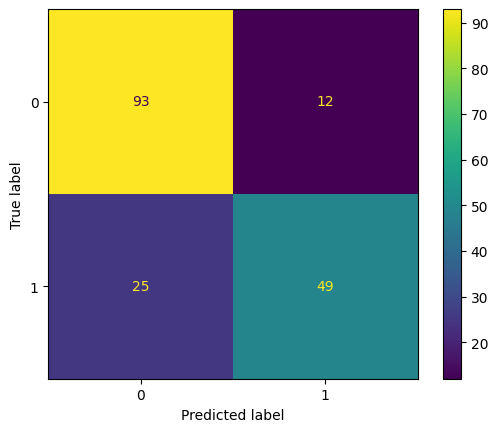

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=c)
cfd.plot()

In [118]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       105
           1       0.80      0.66      0.73        74

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



prediction

In [120]:
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [123]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Sex', 'Embarked'], dtype='object'))])

In [126]:
xnew_pre = pre.transform(xnew)
xnew_pre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.873482,0.386231,-0.499470,-0.400248,-0.497413,0.0,1.0,0.0,1.0,0.0
1,0.873482,1.371370,0.616992,-0.400248,-0.512278,1.0,0.0,0.0,0.0,1.0
2,-0.315819,2.553537,-0.499470,-0.400248,-0.464100,0.0,1.0,0.0,1.0,0.0
3,0.873482,-0.204852,-0.499470,-0.400248,-0.482475,0.0,1.0,0.0,0.0,1.0
4,0.873482,-0.598908,0.616992,0.619896,-0.417492,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,0.873482,-0.204852,-0.499470,-0.400248,-0.493455,0.0,1.0,0.0,0.0,1.0
414,-1.505120,0.740881,-0.499470,-0.400248,1.314435,1.0,0.0,1.0,0.0,0.0
415,0.873482,0.701476,-0.499470,-0.400248,-0.507796,0.0,1.0,0.0,0.0,1.0
416,0.873482,-0.204852,-0.499470,-0.400248,-0.493455,0.0,1.0,0.0,0.0,1.0


In [129]:
cols = pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'], dtype=object)

In [130]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.873482,0.386231,-0.499470,-0.400248,-0.497413,0.0,1.0,0.0,1.0,0.0
1,0.873482,1.371370,0.616992,-0.400248,-0.512278,1.0,0.0,0.0,0.0,1.0
2,-0.315819,2.553537,-0.499470,-0.400248,-0.464100,0.0,1.0,0.0,1.0,0.0
3,0.873482,-0.204852,-0.499470,-0.400248,-0.482475,0.0,1.0,0.0,0.0,1.0
4,0.873482,-0.598908,0.616992,0.619896,-0.417492,1.0,0.0,0.0,0.0,1.0


In [133]:
preds =best_gbc.predict(xnew)
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [134]:
prob = best_gbc.predict_proba(xnew_pre)[:,1]
prob[0:5]


array([0.13593243, 0.38851332, 0.13593243, 0.14687569, 0.4906812 ])

In [136]:
df_final = xnew[['PassengerId']]
df_final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [137]:
df_final['SURVIVED PRED'] = preds
df_final['SURVIVED PROBABILITY'] = prob

In [138]:
df_final

,PassengerId,SURVIVED PRED,SURVIVED PROBABILITY
0,892,0,0.135932
1,893,0,0.388513
2,894,0,0.135932
3,895,0,0.146876
4,896,0,0.490681
...,...,...,...
413,1305,0,0.146876
414,1306,1,0.911138
415,1307,0,0.135932
416,1308,0,0.146876


<Axes: title={'center': 'Countplot for Survived_pred'}, xlabel='SURVIVED PRED'>

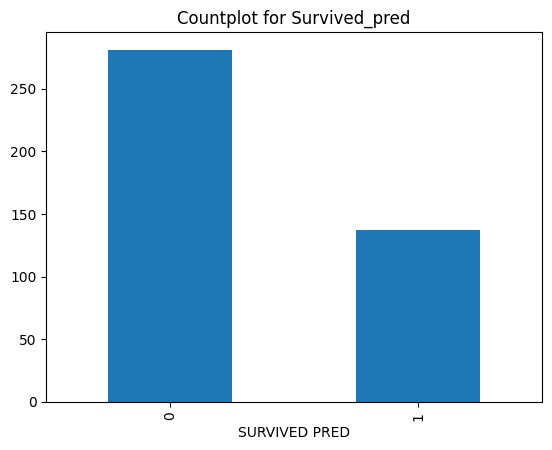

In [139]:
df_final['SURVIVED PRED'].value_counts().plot(kind='bar',title='Countplot for Survived_pred')

In [140]:
df_final.to_csv('finalresult.csv', index=False)

In [141]:
imp = best_gbc.feature_importances_
imp

array([0.17894054, 0.08395391, 0.05208073, 0.0014579 , 0.10827611,
       0.359642  , 0.19932174, 0.00247307, 0.        , 0.01385401])

In [142]:
xtrain.columns

Index(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'],
      dtype='object')

In [144]:
imp = pd.Series(imp)
imp.index = xtrain.columns
imp = imp.sort_values(ascending=False)
imp

cat__Sex_female    0.359642
cat__Sex_male      0.199322
num__Pclass        0.178941
num__Fare          0.108276
num__Age           0.083954
num__SibSp         0.052081
cat__Embarked_S    0.013854
cat__Embarked_C    0.002473
num__Parch         0.001458
cat__Embarked_Q    0.000000
dtype: float64

<Axes: title={'center': 'Feature Importances'}>

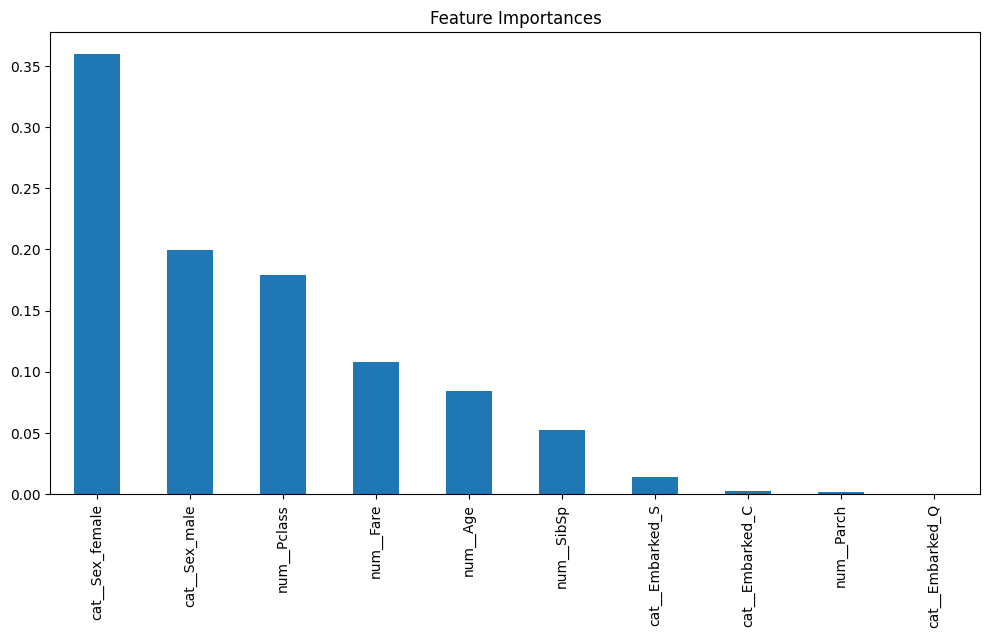

In [145]:
imp.plot(kind='bar', title='Feature Importances', figsize=(12, 6))